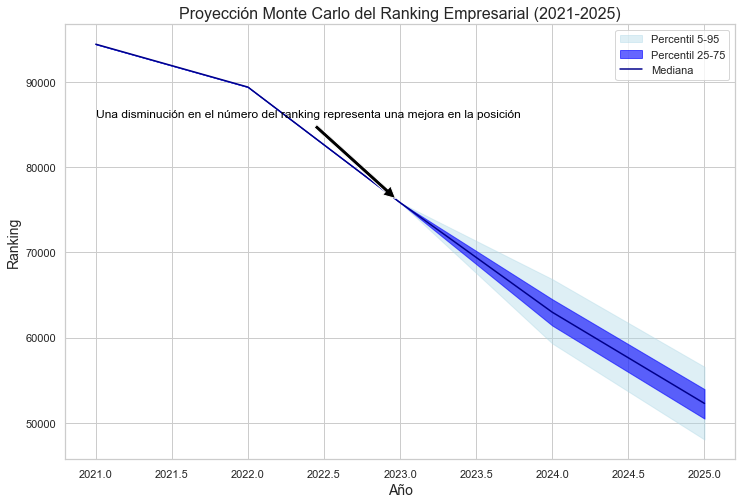

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Datos iniciales
ranking_inicial = 94435
mejora_2022 = 0.0533
mejora_2023 = 0.1517

# Parámetros de la simulación
num_simulaciones = 1000
años = np.arange(2021, 2026)
mejoras_anuales = np.random.normal(0.17, 0.03, (num_simulaciones, len(años) - 3))

# Inicializar matriz de resultados
resultados = np.zeros((num_simulaciones, len(años)))
resultados[:, 0] = ranking_inicial
resultados[:, 1] = resultados[:, 0] * (1 - mejora_2022)
resultados[:, 2] = resultados[:, 1] * (1 - mejora_2023)

# Realizar simulaciones
for i in range(num_simulaciones):
    for j in range(3, len(años)):
        resultados[i, j] = resultados[i, j - 1] * (1 - mejoras_anuales[i, j - 3])

# Calcular percentiles
percentiles = np.percentile(resultados, [5, 25, 50, 75, 95], axis=0)

# Crear gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Rellenar áreas de percentiles
plt.fill_between(años, percentiles[0], percentiles[4], color="lightblue", alpha=0.4, label="Percentil 5-95")
plt.fill_between(años, percentiles[1], percentiles[3], color="blue", alpha=0.6, label="Percentil 25-75")

# Línea de la mediana
plt.plot(años, percentiles[2], color="darkblue", label="Mediana")

# Anotación explicativa
plt.annotate("Una disminución en el número del ranking representa una mejora en la posición",
             xy=(2023, percentiles[2, 2]), xytext=(2021, percentiles[2, 2] + 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color="black")

# Configurar etiquetas y título
plt.xlabel("Año", fontsize=14)
plt.ylabel("Ranking", fontsize=14)
plt.title("Proyección Monte Carlo del Ranking Empresarial (2021-2025)", fontsize=16)
plt.legend()

# Guardar gráfico
plt.savefig("proyeccion_montecarlo_ranking.png")

# Mostrar gráfico
plt.show()

